In [8]:
import pandas as pd
import sklearn.cluster as clust
import matplotlib.pyplot as plt
import numpy as np

In [6]:
orig = pd.read_csv("../text-mining-project-data/clean/lem-tfidf-100.csv")
df = orig.drop("labels", axis=1)
df

,american,attack,authority,black,called,case,child,city,come,community,...,violence,want,way,week,weons,white,woman,work,year,york
0,0.0,0.198012,0.210612,0.0,0.196918,0.000000,0.000000,0.198675,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.185662,0.0,0.000000,0.000000,0.000000,0.125623,0.233055
1,0.0,0.000000,0.232382,0.0,0.217273,0.000000,0.000000,0.219212,0.000000,0.000000,...,0.205280,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.000000,0.0,0.000000,0.225908,0.220709,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.212417,0.193397,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.333065,0.177129,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.173199,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.105651,0.000000
4,0.0,0.000000,0.000000,0.0,0.203942,0.000000,0.219440,0.205762,0.000000,0.000000,...,0.192685,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2620,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.168156,0.000000,0.161374,0.000000,...,0.295308,0.169798,0.000000,0.000000,0.0,0.000000,0.000000,0.172332,0.000000,0.000000
2621,0.0,0.000000,0.116047,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.102512,0.000000,0.000000,0.204599,0.0,0.000000,0.128679,0.000000,0.069218,0.000000
2622,0.0,0.000000,0.000000,0.0,0.131775,0.000000,0.000000,0.000000,0.000000,0.137812,...,0.124502,0.000000,0.000000,0.124243,0.0,0.297896,0.000000,0.000000,0.000000,0.000000
2623,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.097416,0.000000,0.106775,0.000000,0.0,0.116544,0.000000,0.000000,0.000000,0.000000


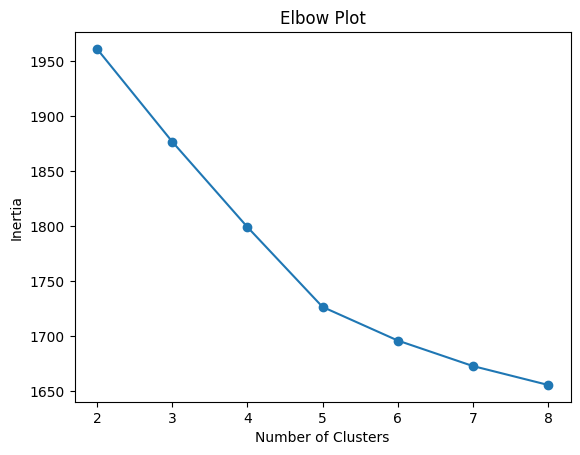

In [27]:
n_iters = 100
n_clusters = np.arange(2, 9)
inertia = np.zeros(n_clusters.shape[0])

for n in range(n_iters):
    for i, val in enumerate(n_clusters):
        kmeans = clust.KMeans(n_clusters=val)
        kmeans.fit(df)
        inertia[i] += kmeans.inertia_
        
for n in range(len(inertia)):
    inertia[n] = inertia[n] / n_iters
        
plt.title("Elbow Plot")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.plot(n_clusters, inertia)
plt.scatter(n_clusters, inertia)

For n_clusters = 2 The average silhouette_score is : 0.05103942226874492
For n_clusters = 3 The average silhouette_score is : 0.053999643934996455
For n_clusters = 4 The average silhouette_score is : 0.0617745475379371
For n_clusters = 5 The average silhouette_score is : 0.07621030048919512
For n_clusters = 6 The average silhouette_score is : 0.07578996154568235
For n_clusters = 7 The average silhouette_score is : 0.07480423997558351
For n_clusters = 8 The average silhouette_score is : 0.07391523265582947


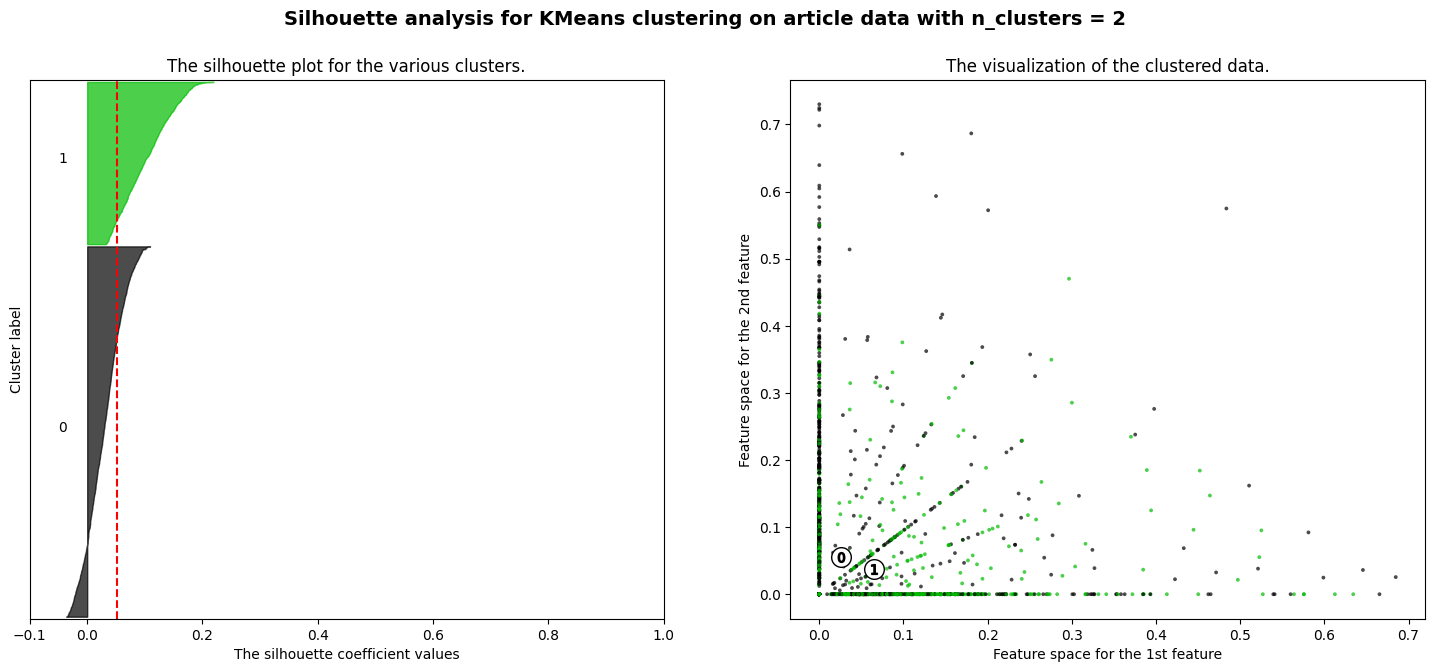

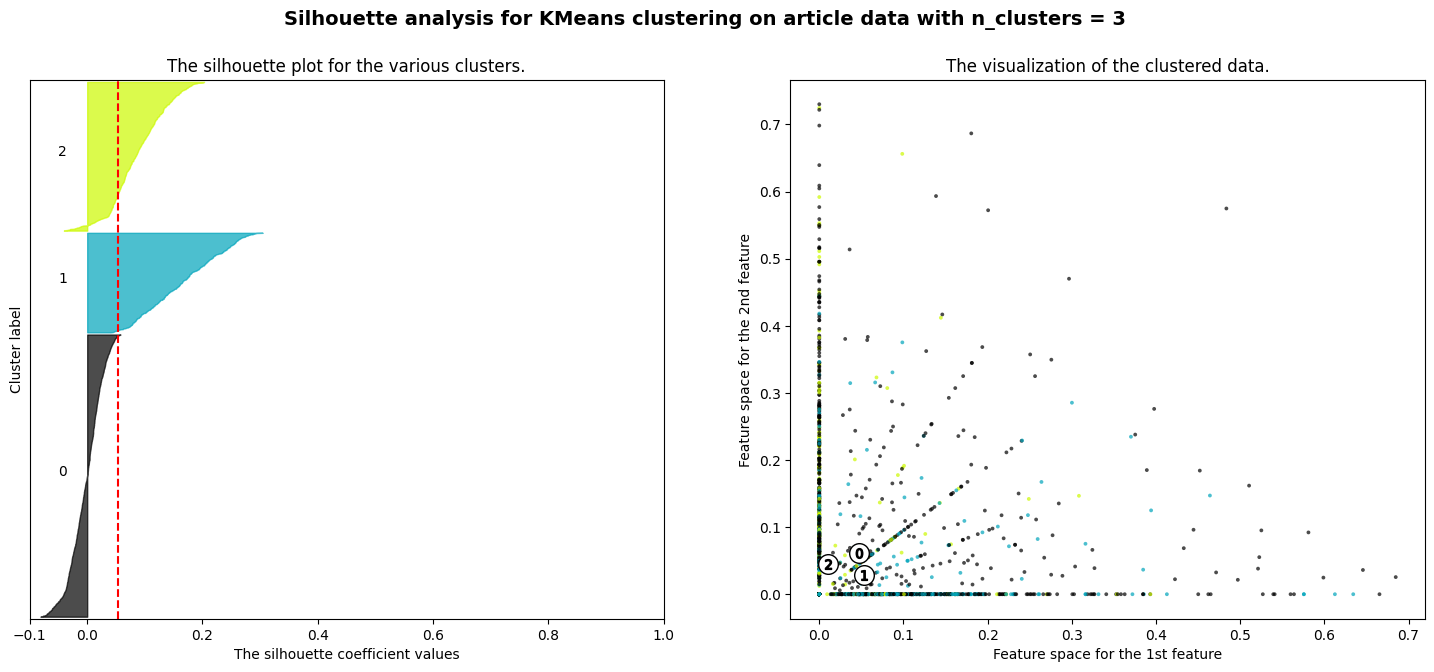

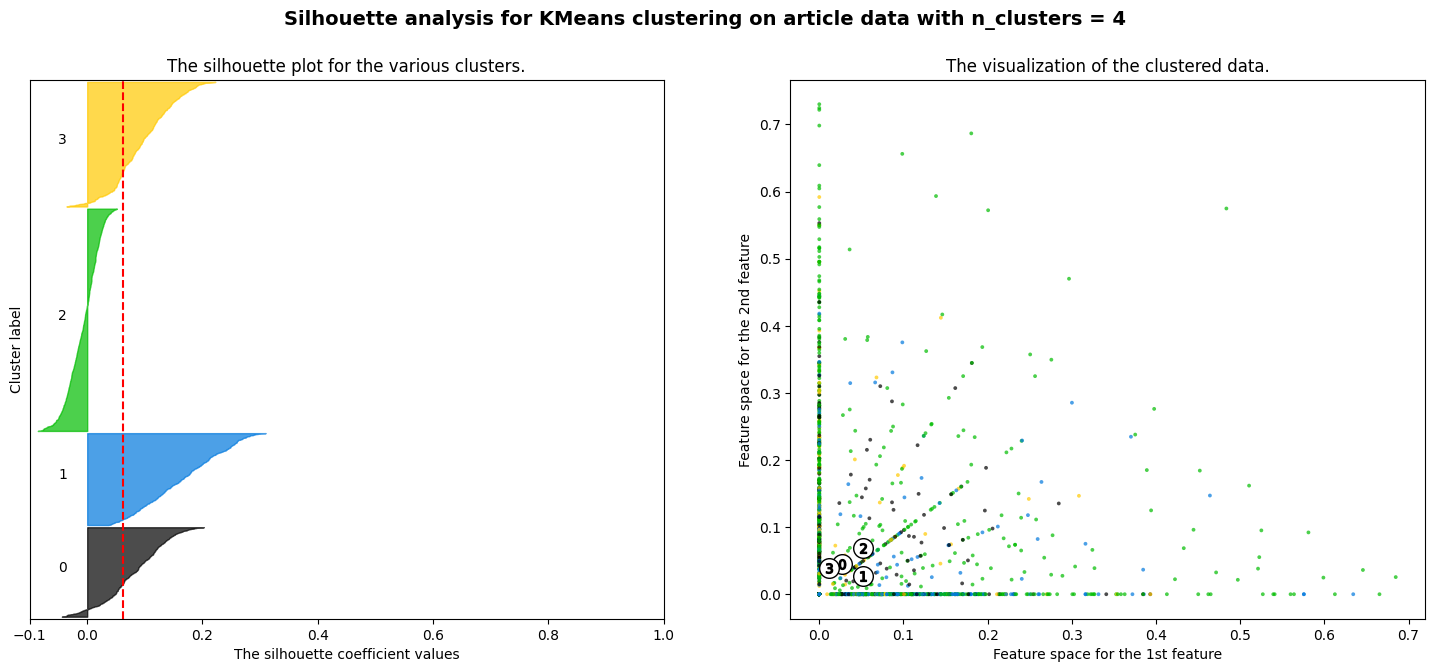

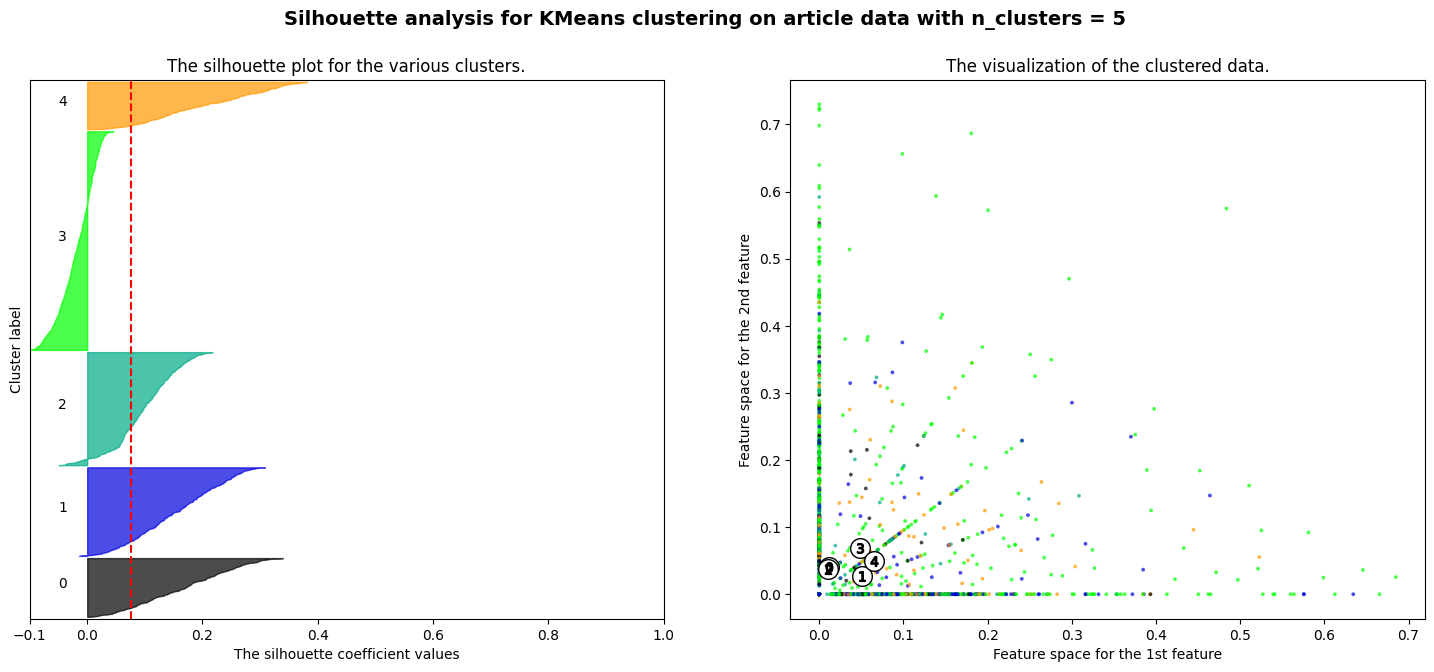

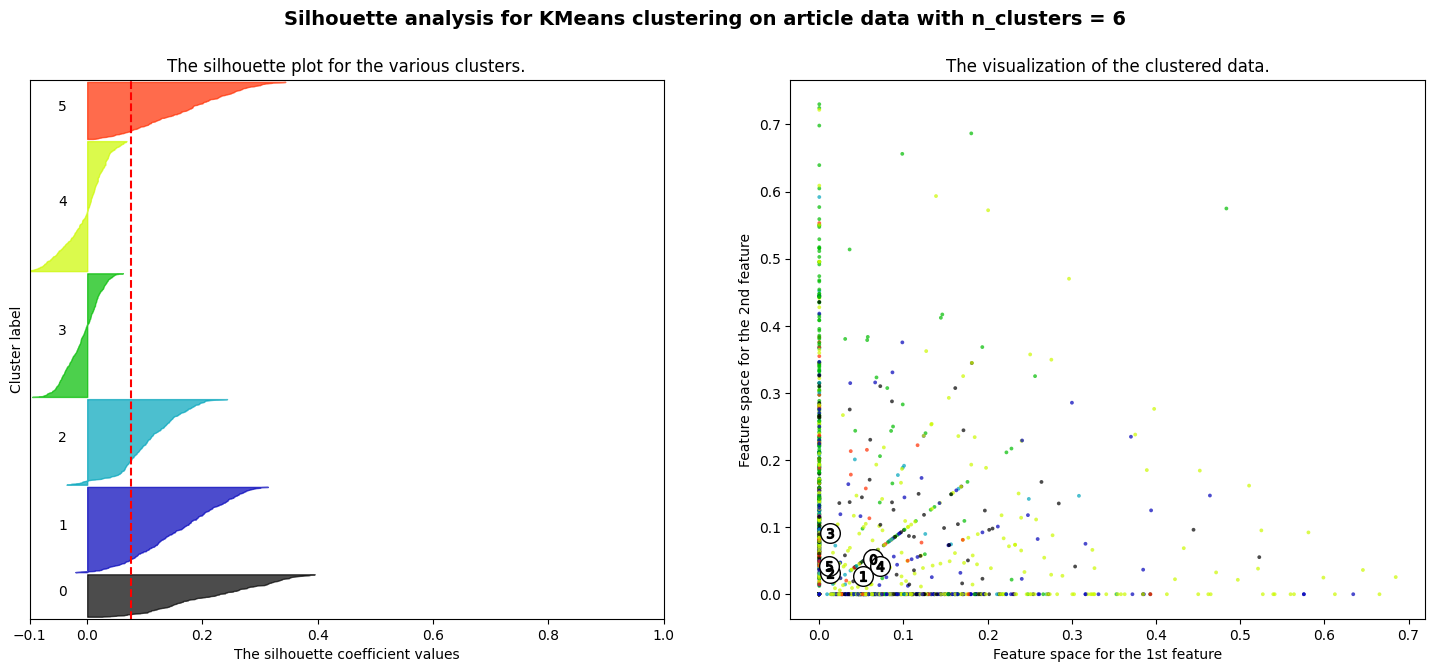

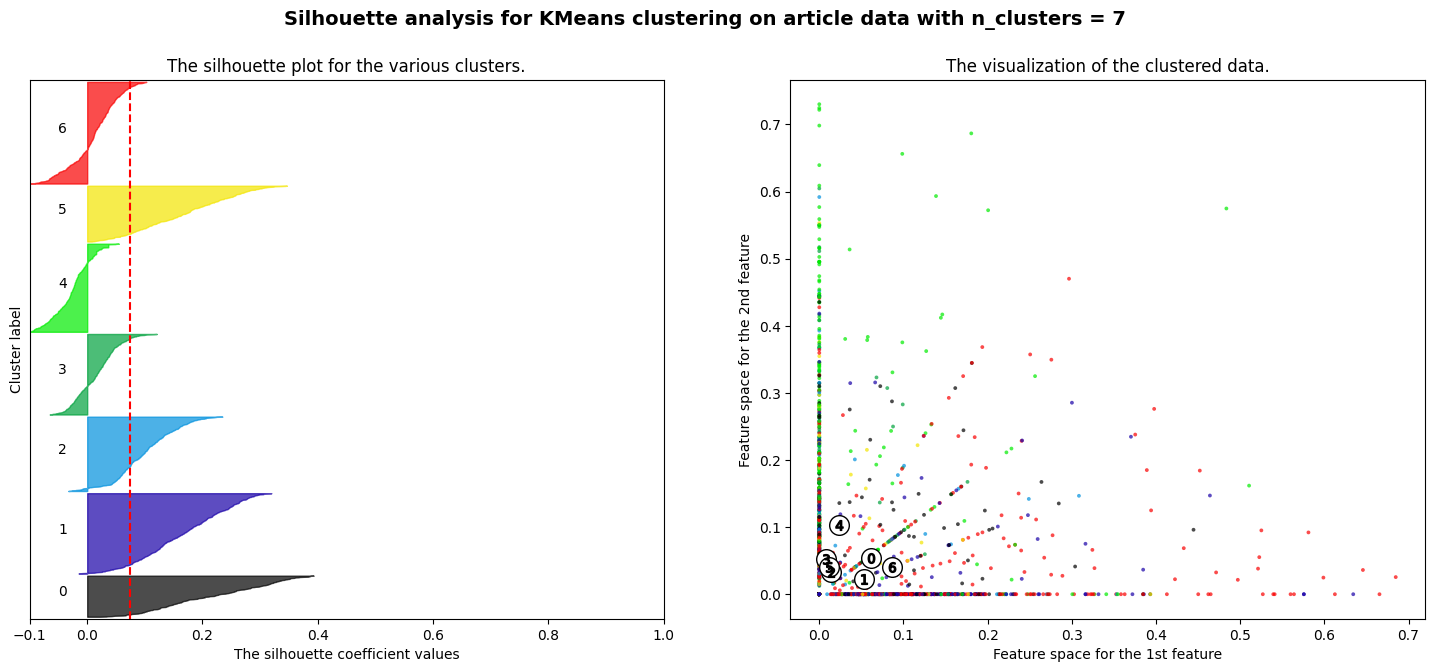

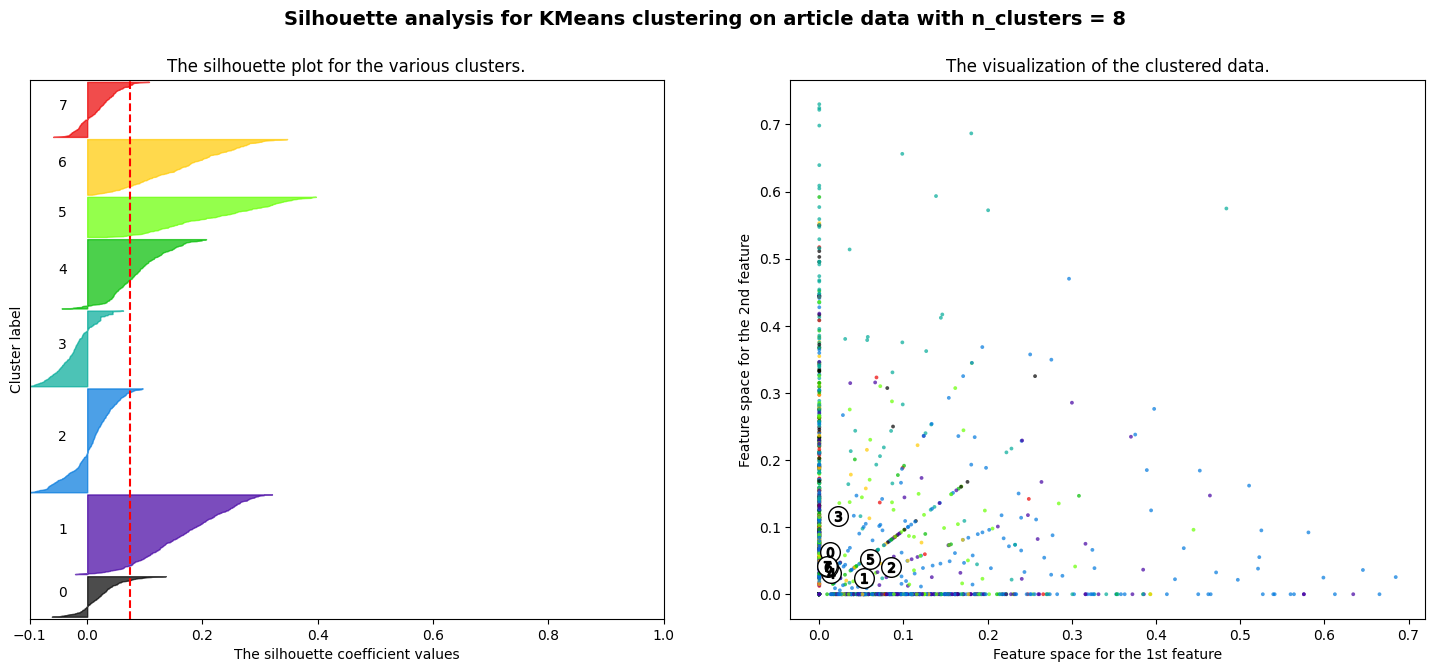

In [82]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause
# Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

X = df.values

range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on article data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [83]:
# Create data for hierarchical clustering
left = orig[orig["labels"] == "left"].sample(40)
right = orig[orig["labels"] == "right"].sample(40)

total = pd.concat((left, right))
total.to_csv("../text-mining-project-data/clean/lem-tfidf-100-samp.csv")

In [55]:
import sklearn.decomposition as decomp
import sklearn.preprocessing as pp

In [56]:
df

,american,attack,authority,black,called,case,child,city,come,community,...,violence,want,way,week,weons,white,woman,work,year,york
0,0.0,0.198012,0.210612,0.0,0.196918,0.000000,0.000000,0.198675,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.185662,0.0,0.000000,0.000000,0.000000,0.125623,0.233055
1,0.0,0.000000,0.232382,0.0,0.217273,0.000000,0.000000,0.219212,0.000000,0.000000,...,0.205280,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.0,0.000000,0.000000,0.0,0.000000,0.225908,0.220709,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.212417,0.193397,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.333065,0.177129,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.173199,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.105651,0.000000
4,0.0,0.000000,0.000000,0.0,0.203942,0.000000,0.219440,0.205762,0.000000,0.000000,...,0.192685,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2620,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.168156,0.000000,0.161374,0.000000,...,0.295308,0.169798,0.000000,0.000000,0.0,0.000000,0.000000,0.172332,0.000000,0.000000
2621,0.0,0.000000,0.116047,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.102512,0.000000,0.000000,0.204599,0.0,0.000000,0.128679,0.000000,0.069218,0.000000
2622,0.0,0.000000,0.000000,0.0,0.131775,0.000000,0.000000,0.000000,0.000000,0.137812,...,0.124502,0.000000,0.000000,0.124243,0.0,0.297896,0.000000,0.000000,0.000000,0.000000
2623,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.097416,0.000000,0.106775,0.000000,0.0,0.116544,0.000000,0.000000,0.000000,0.000000


In [57]:
scaler = pp.StandardScaler()
pca = decomp.PCA(n_components=3)

In [59]:
scaled_data = scaler.fit_transform(df)
pca_out = pca.fit_transform(scaled_data)

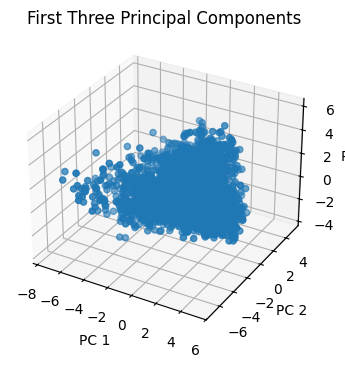

In [81]:
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(projection="3d")
ax.scatter(pca_out[:, 0], pca_out[:, 1],
           pca_out[:, 2])
ax.set_xlabel("PC 1")
ax.set_ylabel("PC 2")
ax.set_zlabel("PC 3")
ax.set_title("First Three Principal Components")
plt.savefig("test.png")
plt.show()

In [88]:
kmeans = clust.KMeans(n_clusters=5)
clusters = kmeans.fit_predict(df)

In [89]:
clusters

array([4, 3, 3, ..., 2, 2, 2], dtype=int32)

In [99]:
clustered_df = pd.concat((pd.Series(clusters, name="cluster"), df), axis=1)
clustered_df[""]

,cluster,american,attack,authority,black,called,case,child,city,come,...,violence,want,way,week,weons,white,woman,work,year,york
0,4,0.0,0.198012,0.210612,0.0,0.196918,0.000000,0.000000,0.198675,0.000000,...,0.000000,0.000000,0.000000,0.185662,0.0,0.000000,0.000000,0.000000,0.125623,0.233055
1,3,0.0,0.000000,0.232382,0.0,0.217273,0.000000,0.000000,0.219212,0.000000,...,0.205280,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,3,0.0,0.000000,0.000000,0.0,0.000000,0.225908,0.220709,0.000000,0.000000,...,0.000000,0.000000,0.212417,0.193397,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0,0.0,0.333065,0.177129,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.105651,0.000000
4,3,0.0,0.000000,0.000000,0.0,0.203942,0.000000,0.219440,0.205762,0.000000,...,0.192685,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2620,3,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.168156,0.000000,0.161374,...,0.295308,0.169798,0.000000,0.000000,0.0,0.000000,0.000000,0.172332,0.000000,0.000000
2621,0,0.0,0.000000,0.116047,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.102512,0.000000,0.000000,0.204599,0.0,0.000000,0.128679,0.000000,0.069218,0.000000
2622,2,0.0,0.000000,0.000000,0.0,0.131775,0.000000,0.000000,0.000000,0.000000,...,0.124502,0.000000,0.000000,0.124243,0.0,0.297896,0.000000,0.000000,0.000000,0.000000
2623,2,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.097416,0.000000,0.106775,0.000000,0.0,0.116544,0.000000,0.000000,0.000000,0.000000


,cluster,american,attack,authority,black,called,case,child,city,come,...,violence,want,way,week,weons,white,woman,work,year,york
0,4,0.0,0.198012,0.210612,0.0,0.196918,0.000000,0.000000,0.198675,0.000000,...,0.000000,0.000000,0.000000,0.185662,0.0,0.000000,0.000000,0.000000,0.125623,0.233055
1,3,0.0,0.000000,0.232382,0.0,0.217273,0.000000,0.000000,0.219212,0.000000,...,0.205280,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,3,0.0,0.000000,0.000000,0.0,0.000000,0.225908,0.220709,0.000000,0.000000,...,0.000000,0.000000,0.212417,0.193397,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0,0.0,0.333065,0.177129,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.105651,0.000000
4,3,0.0,0.000000,0.000000,0.0,0.203942,0.000000,0.219440,0.205762,0.000000,...,0.192685,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2620,3,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.168156,0.000000,0.161374,...,0.295308,0.169798,0.000000,0.000000,0.0,0.000000,0.000000,0.172332,0.000000,0.000000
2621,0,0.0,0.000000,0.116047,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.102512,0.000000,0.000000,0.204599,0.0,0.000000,0.128679,0.000000,0.069218,0.000000
2622,2,0.0,0.000000,0.000000,0.0,0.131775,0.000000,0.000000,0.000000,0.000000,...,0.124502,0.000000,0.000000,0.124243,0.0,0.297896,0.000000,0.000000,0.000000,0.000000
2623,2,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.097416,0.000000,0.106775,0.000000,0.0,0.116544,0.000000,0.000000,0.000000,0.000000
